<a href="https://colab.research.google.com/github/AnshumanGiramkar/Cassie_ILY/blob/main/Cassandra_ily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chat with your PDF files using LlamaIndex, Astra DB (Apache Cassandra), and Gradient's open-source models, including LLama2 and Streamlit, all designed for seamless interaction with PDF files.


<a href="https://colab.research.google.com/github/bhattbhavesh91//pdf-q-a-llamaindex-llama2/blob/main/pdf-q-a-notebook.ipynb" target="_blank"><img height="40" alt="Run your own notebook in Colab" src = "https://colab.research.google.com/assets/colab-badge.svg"></a>

#What is LLAMA Index?

LlamaIndex, formerly known as GPT Index, is a data framework specifically designed to facilitate the development of applications powered by Large Language Models (LLMs). It essentially acts as a bridge between your data and LLMs, enabling them to work together effectively.

* Improved LLM accuracy: By providing LLMs with relevant and
well-structured data, LlamaIndex helps them generate more accurate and informative outputs.
* Streamlined development: It simplifies the process of building LLM applications by offering pre-built tools and functionalities.
* Flexibility: It supports various data sources, LLMs, and application types, allowing for customization and adaptation to different needs.

Sources:

* LlamaIndex website: https://www.llamaindex.ai/
* GitHub repository: https://github.com/run-llama
* Blog post: https://nanonets.com/blog/llamaindex/

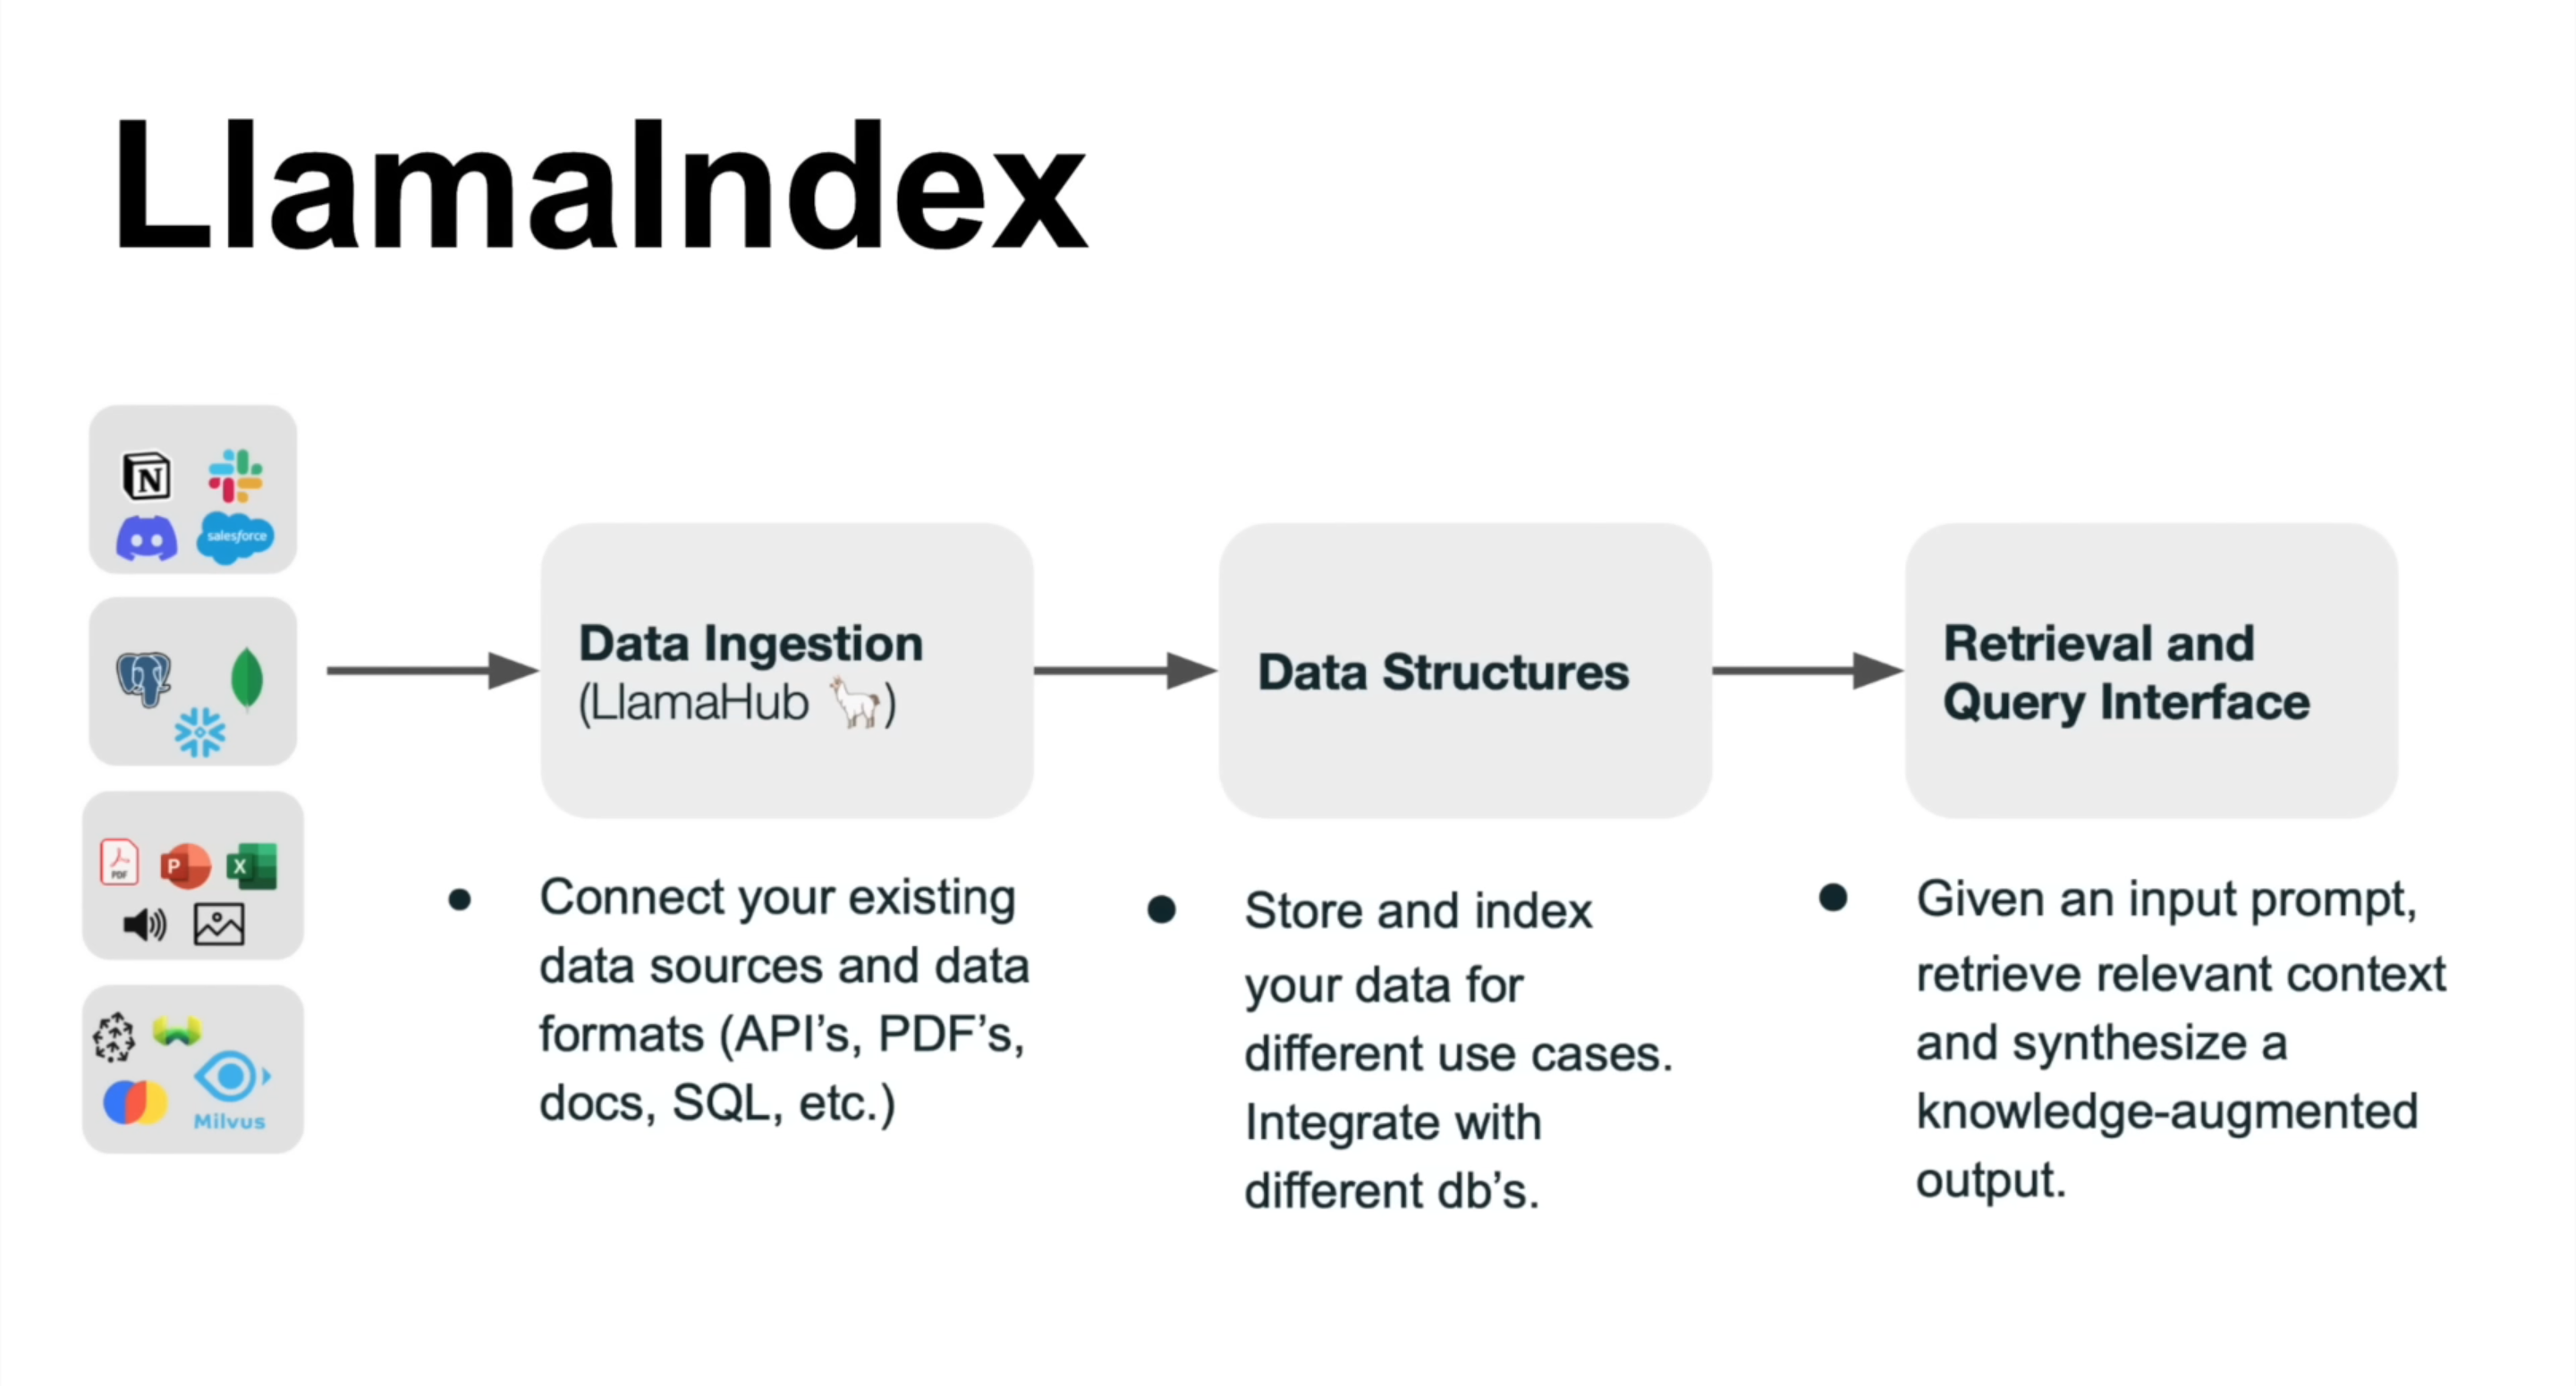

# Installation

In [ ]:
!pip install -q cassandra-driver
!pip install -q cassio>=0.1.1
!pip install -q gradientai --upgrade
!pip install -q llama-index
!pip install -q pypdf
!pip install -q tiktoken==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install llama-index-llms-gradient
!pip install llama-index-embeddings-gradient

In [ ]:
!pip install llama-index-vector-stores-cassandra

# Import OS & JSON Modules

In [ ]:
import os
import json
from google.colab import userdata

os.environ['GRADIENT_ACCESS_TOKEN'] = userdata.get("GRADIENT_ACCESS_TOKEN")
os.environ['GRADIENT_WORKSPACE_ID'] =  userdata.get("GRADIENT_WORKSPACE_ID")

# Import Cassandra & llama Index

In [ ]:
from cassandra.auth import PlainTextAuthProvider
from cassandra.cluster import Cluster

In [ ]:
from llama_index.core import ServiceContext
from llama_index.core import Settings
from llama_index.core import set_global_service_context
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, StorageContext
from llama_index.embeddings.gradient import GradientEmbedding
from llama_index.llms.gradient import GradientBaseModelLLM
from llama_index.vector_stores.cassandra import CassandraVectorStore

In [ ]:
import cassandra
print (cassandra.__version__)

3.29.0


# Connect to the VectorDB

In [ ]:
# This secure connect bundle is autogenerated when you donwload your SCB,
# if yours is different update the file name below
cloud_config= {
  'secure_connect_bundle': 'secure-connect-temp-db.zip'
}

# This token json file is autogenerated when you donwload your token,
# if yours is different update the file name below
with open("temp_db-token.json") as f:
    secrets = json.load(f)

CLIENT_ID = secrets["clientId"]
CLIENT_SECRET = secrets["secret"]

auth_provider = PlainTextAuthProvider(CLIENT_ID, CLIENT_SECRET)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
  print(row[0])
else:
  print("An error occurred.")

ERROR:cassandra.connection:Closing connection <AsyncoreConnection(134533095867536) 40c43387-6f4d-4f0d-bd4f-e09382ce8501-us-east1.db.astra.datastax.com:29042:8e918b35-33a5-411a-b5ee-405168430ad2> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


4.0.0.6816


# Define the Gradient's Model Adapter for LLAMA-2

In [ ]:
llm = GradientBaseModelLLM(
    base_model_slug="llama2-7b-chat",
    max_tokens=400,
)

# Configure Gradient embeddings

In [ ]:
embed_model = GradientEmbedding(
    gradient_access_token = os.environ["GRADIENT_ACCESS_TOKEN"],
    gradient_workspace_id = os.environ["GRADIENT_WORKSPACE_ID"],
    gradient_model_slug="bge-large",
)

In [ ]:
service_context = ServiceContext.from_defaults(
    llm = llm,
    embed_model = embed_model,
    chunk_size=256,
)

set_global_service_context(service_context)

<ipython-input-41-944266470549>:1: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(


In [ ]:
Settings.llm = llm
Settings.embed_model = embed_model
Settings.chunk_size = 256

In [ ]:
settings_dict = {
    "llm": llm,
    "embed_model": embed_model,
    "chunk_size": 256,
}

# Update Settings using dictionary unpacking (Python 3.5+)
Settings.__dict__.update(settings_dict)

# Load the PDFs

In [ ]:
documents = SimpleDirectoryReader("/content/Documents").load_data()
print(f"Loaded {len(documents)} document(s).")

Loaded 15 document(s).


# Setup and Query Index

In [ ]:
index = VectorStoreIndex.from_documents(documents,
                                        service_context=service_context)
query_engine = index.as_query_engine()

In [ ]:
response = query_engine.query("What is Yolov7?")
print(response)

 Based on the provided context information, Yolov7 is a real-time object detector that surpasses all known object detectors in both speed and accuracy in the range of 5 FPS to 160 FPS, with the highest accuracy 56.8% AP test-dev among all known real-time object detectors with 30 FPS or higher on GPU V100. It has 75% less parameters, 36% less computation, and brings 1.5% higher AP compared to the previous version of YOLO, and 43% fewer parameters, 15% less computation, and 0.4% higher AP compared to the state-of-the-art YOLOR-CSP.


In [ ]:
response2 = query_engine.query("Which models are outperformed by YOLO?")

In [ ]:
print(response2)

 Based on the provided context information, the following models are outperformed by YOLO:

1. NAS-FPN: Learning scalable feature pyramid architecture for object detection. (Reference [22])
2. ExpandNets: Linear over-parameterization to train compact convolutional networks. (Reference [24])

Both of these models are mentioned in the context as being outperformed by YOLO.


#How it works?

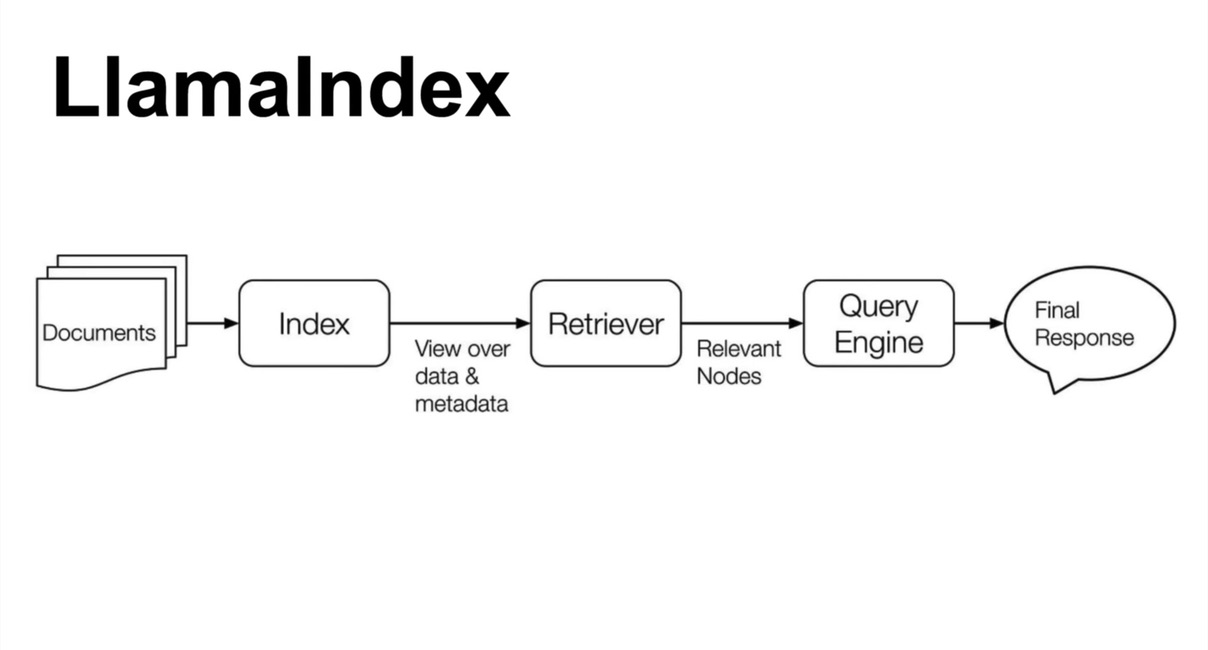

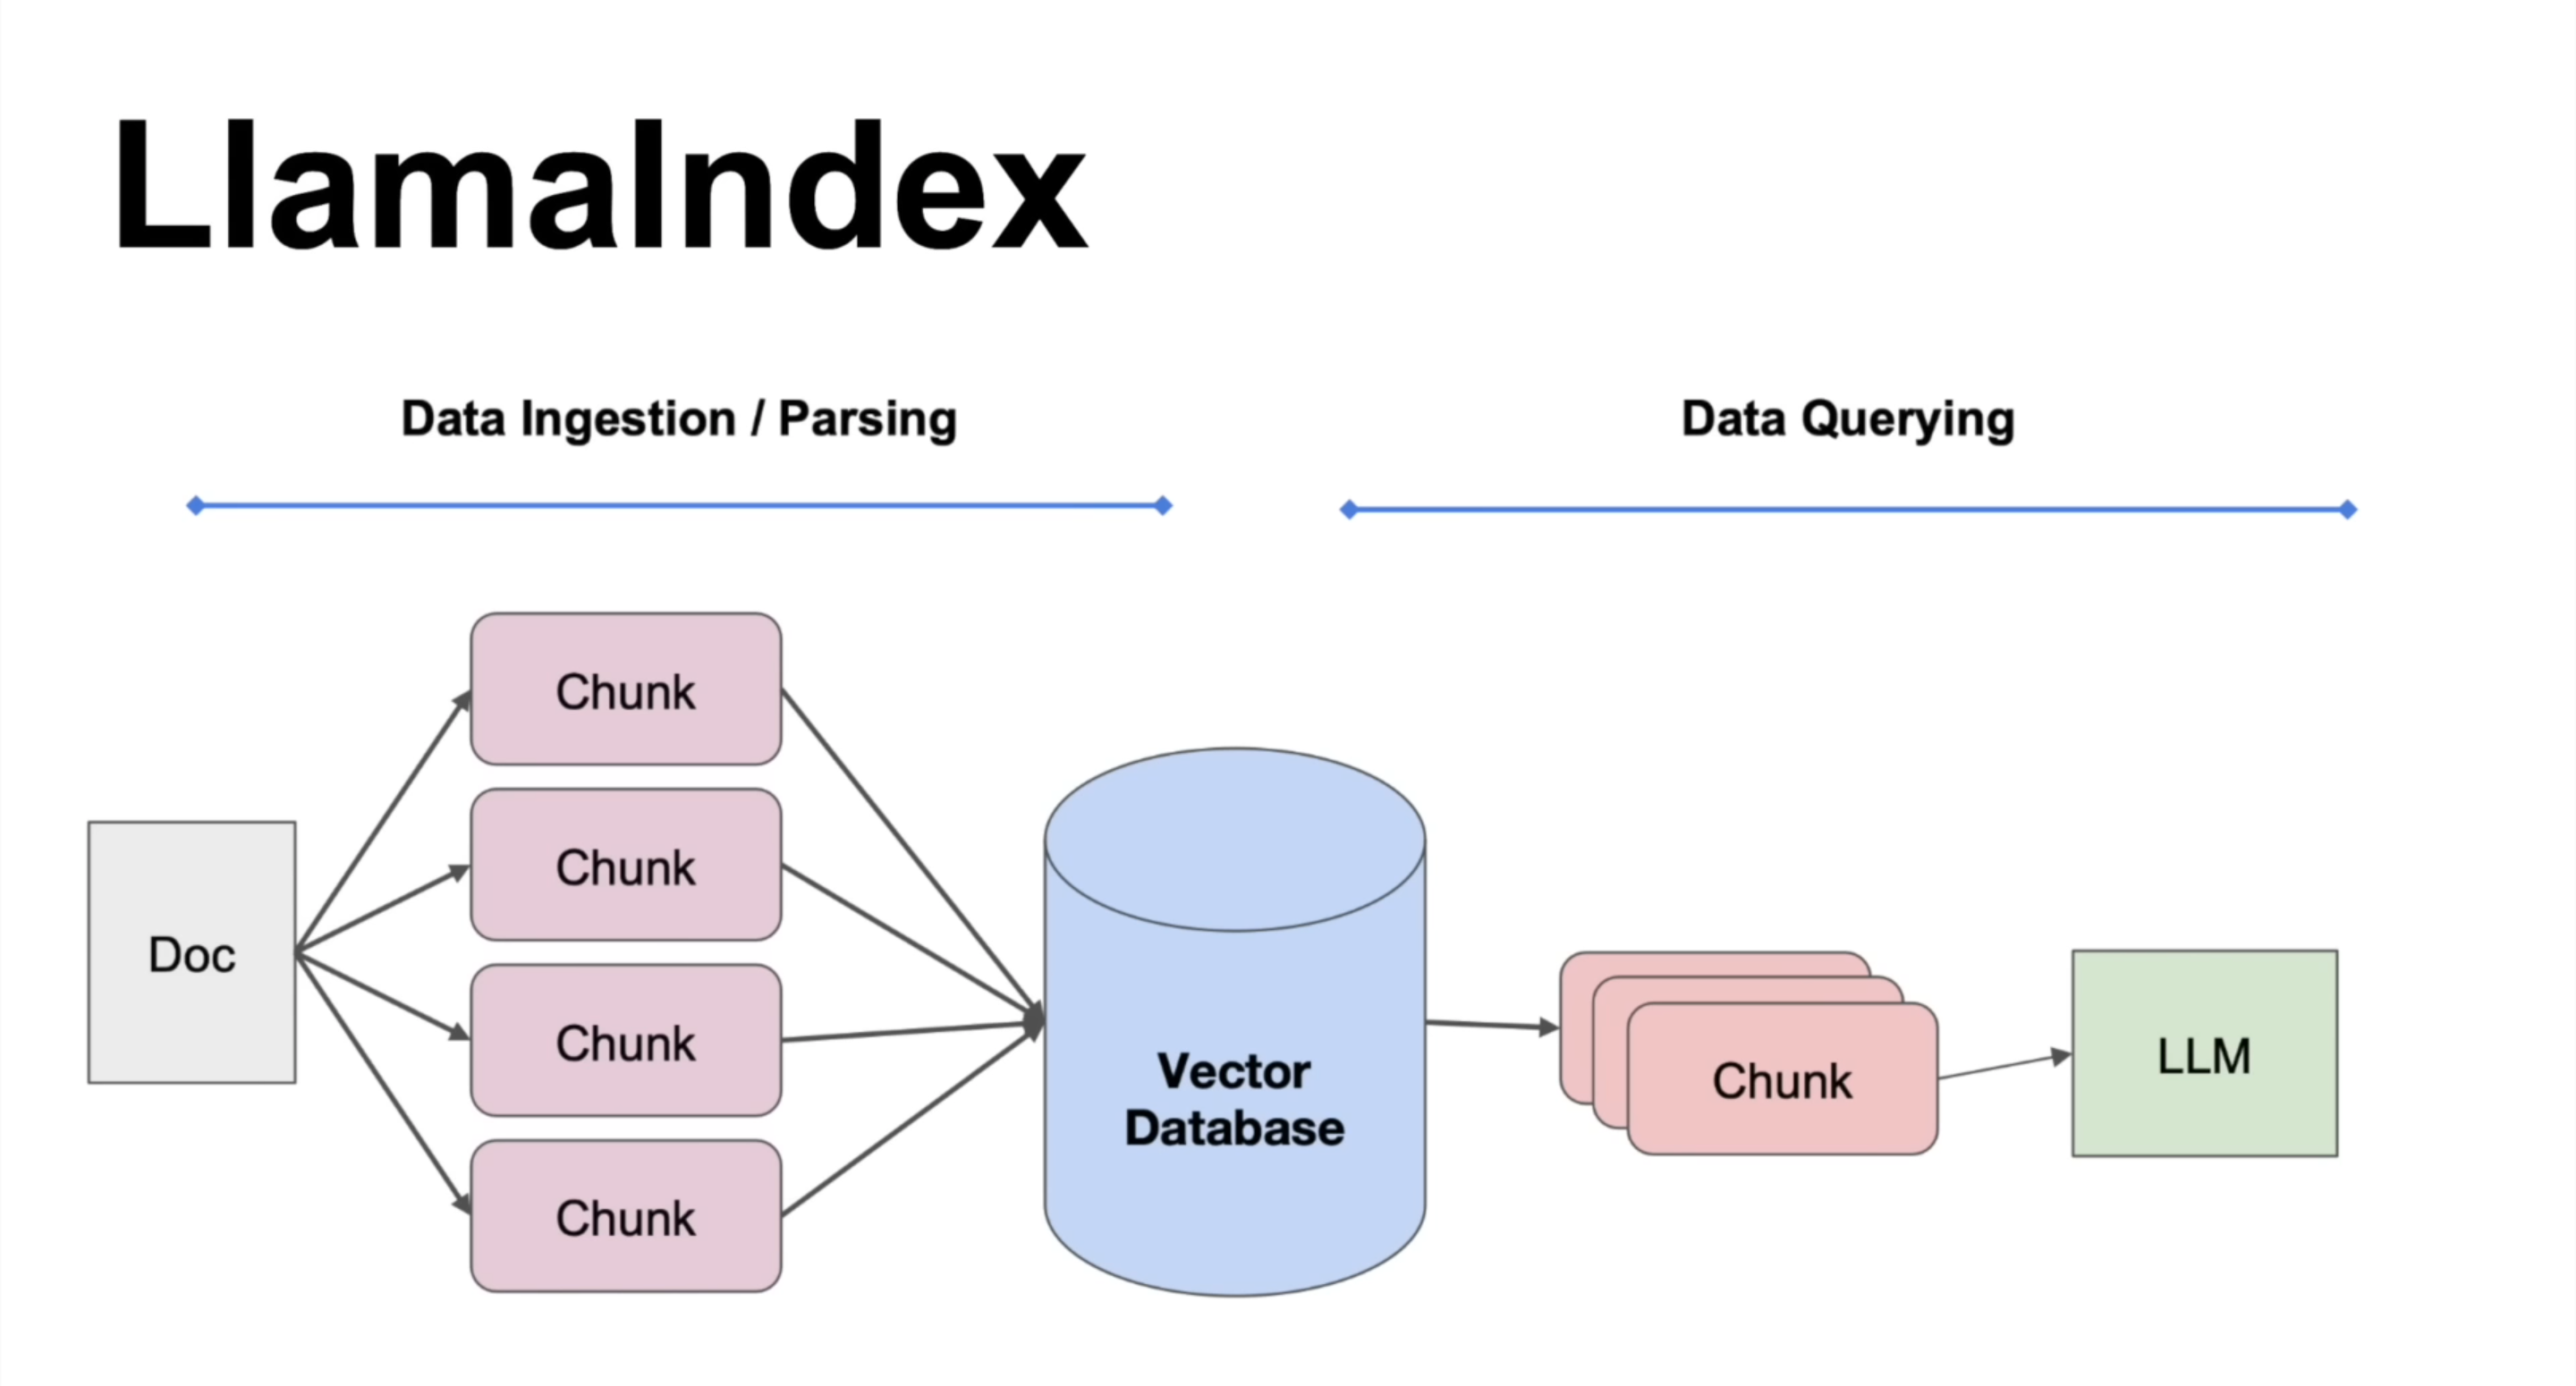

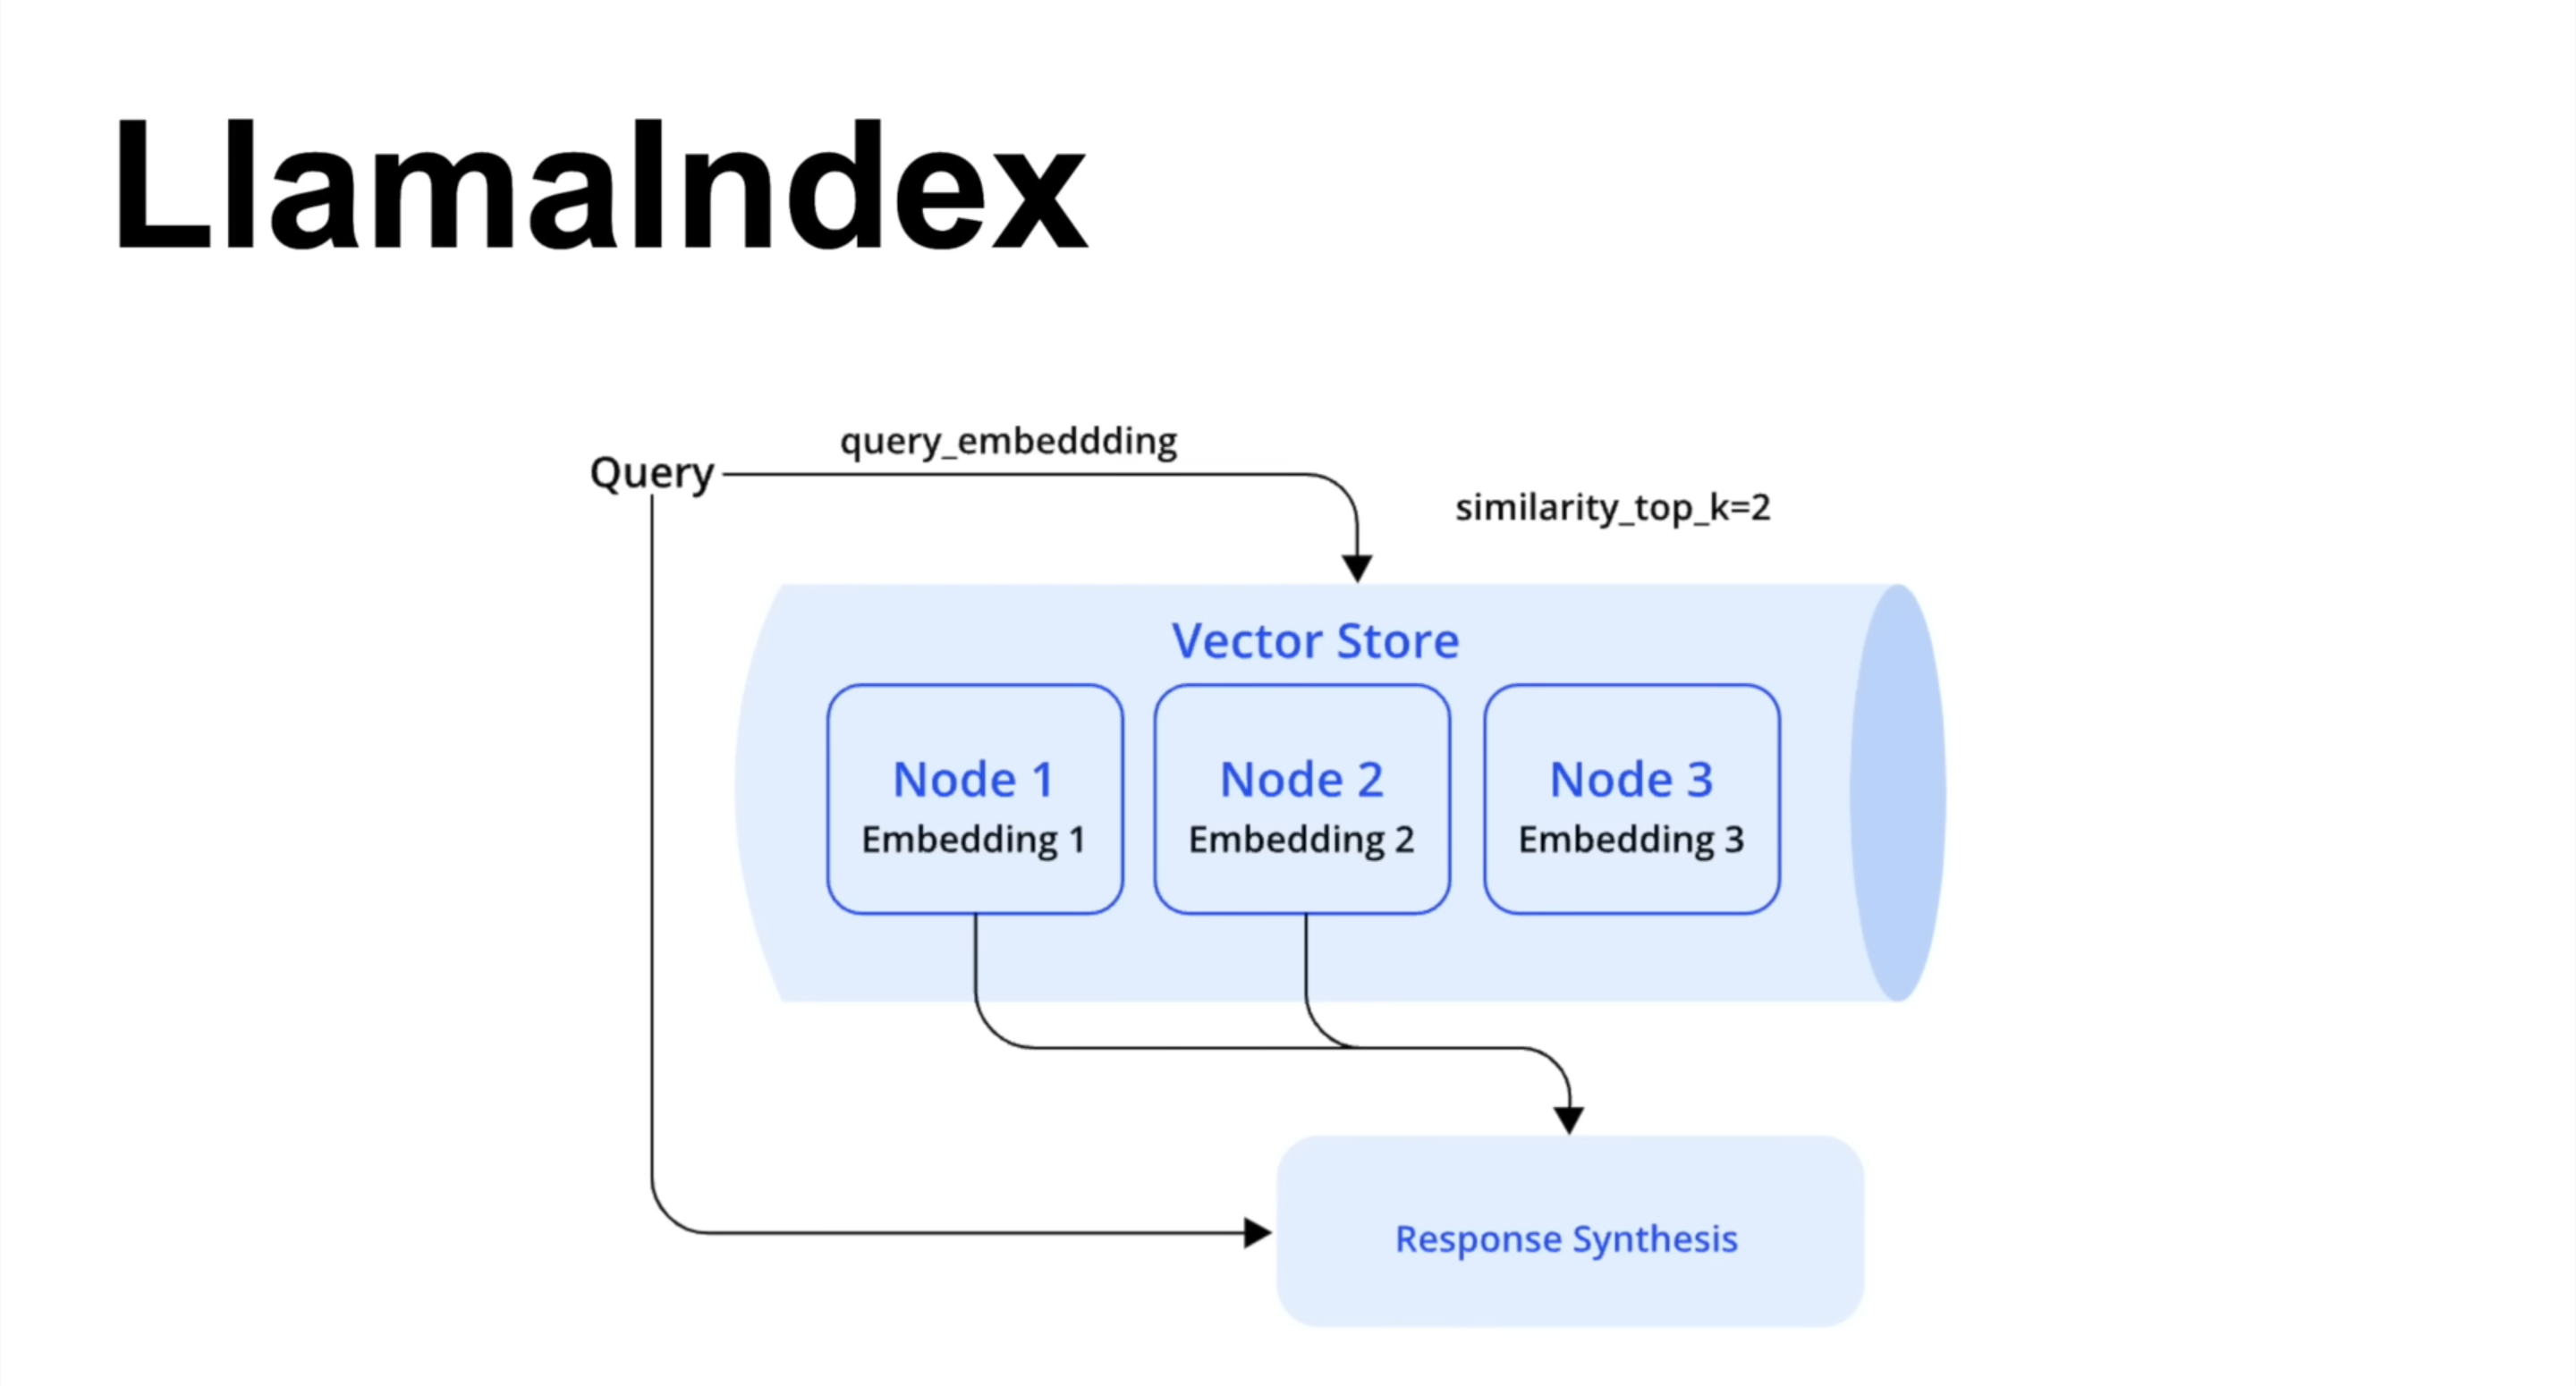